https://www.kaggle.com/datasets/grassknoted/asl-alphabet/data <-- this is the data set

Samples images for letter z


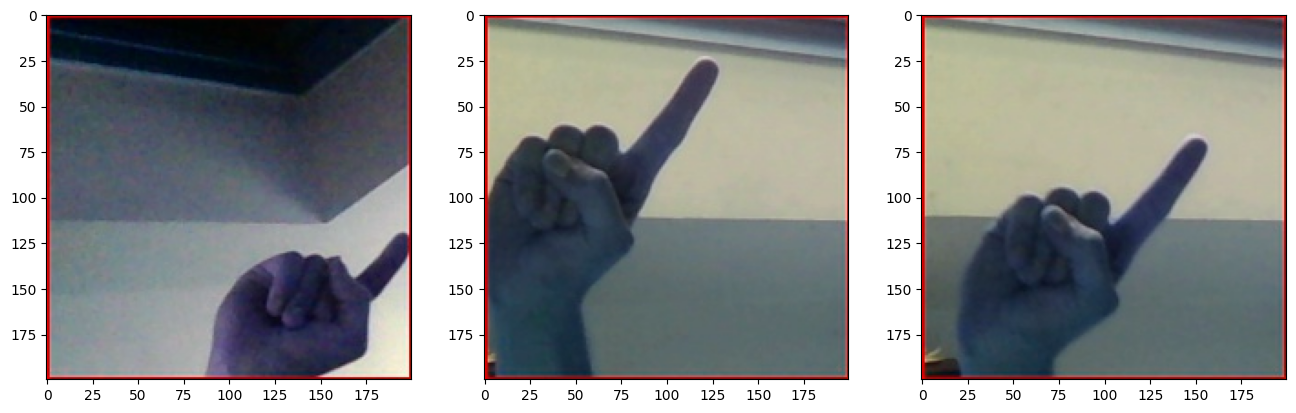

In [7]:
# Imports for Deep Learning

from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
import tensorflow as tf
tf.random.set_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = '../ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('z')

In [8]:
data_dir = "../ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/"
target_size = (64, 64)
target_dims = (64, 64, 3)
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True,
                                    samplewise_std_normalization = True,
                                    validation_split = val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, 
                                                    batch_size=batch_size, shuffle=True, subset="training")

val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")


Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [9]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

my_model.fit_generator(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5


C:\Users\noahf\AppData\Local\Temp\ipykernel_19660\207351418.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_model.fit_generator(train_generator, epochs=5, validation_data=val_generator)


1224/1224 [==============================] - 2518s 2s/step - loss: 3.3677 - accuracy: 0.0333 - val_loss: 3.3674 - val_accuracy: 0.0345
Epoch 2/5
1224/1224 [==============================] - 1855s 2s/step - loss: 3.3675 - accuracy: 0.0338 - val_loss: 3.3673 - val_accuracy: 0.0345
Epoch 3/5
1224/1224 [==============================] - 1863s 2s/step - loss: 3.3676 - accuracy: 0.0328 - val_loss: 3.3673 - val_accuracy: 0.0345
Epoch 4/5
1224/1224 [==============================] - 1860s 2s/step - loss: 3.3675 - accuracy: 0.0328 - val_loss: 3.3673 - val_accuracy: 0.0345
Epoch 5/5
1224/1224 [==============================] - 1857s 2s/step - loss: 3.3675 - accuracy: 0.0328 - val_loss: 3.3673 - val_accuracy: 0.0345


In [257]:
import os 

# test_folder = f'{os.getcwd()}C:\Users\\noahf\Documents\Visual Studio\Project\ASL_Alphabet\\asl_alphabet_test'
test_folder = r'C:\Users\\noahf\Documents\Visual Studio\Project\ASL_Alphabet\\asl_alphabet_test\\asl_alphabet_test'
train_folder = r'C:\Users\\noahf\Documents\Visual Studio\Project\ASL_Alphabet\\asl_alphabet_train\\asl_alphabet_train'

test_images = []
train_images = []

In [343]:
import numpy as np
def img_load(directory):
    images = []
    print(f'function length: {len(os.listdir(directory))}')
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
    
        try:
            img = cv2.resize(img, (224, 224))
        except Exception as e:
            print(os.path.join(directory, filename))
            os.remove(os.path.join(directory, filename))
            continue
        img = img.astype('float32') / 255.0
        images.append(img)

    return np.array(images)


def iterate_folders(directory):
    images = []
    print(f'function length: {len(os.listdir(directory))}')
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)

        if os.path.isdir(subfolder_path):
            #print(f"Subfolder: {subfolder_path}")

            for file in os.listdir(subfolder_path):
                print(images)
                file_path = os.path.join(subfolder_path, file)

                if os.path.isfile(file_path):
                    #print(f"File: {file_path}")
                    img = cv2.imread(os.path.join(directory, filename))
                    try:
                        img = cv2.resize(img, (224, 224))
                    except Exception as e:
                        #print(os.path.join(directory, filename))
                        #os.remove(os.path.join(directory, filename))
                        continue
                    img = img.astype('float32') / 255.0
                    images.append(im)
    return np.array(images)


def img_label(folder):
    data = np.array(folder)
    
    labels = []
    count = 0
    for i in folder:
        labels = np.append(labels, count)
        count += 1

    return labels


In [ ]:
test = img_load(test_folder)
test_labels = img_label(test)

function length: 28


In [ ]:
test = img_load(test_folder)
test_labels = img_label(test)

function length: 28


In [347]:
test = img_load(test_folder)
test_labels = img_label(test)

function length: 28


In [344]:
train = iterate_folders(train_folder)
train_labels = img_label(train)

function length: 29
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

KeyboardInterrupt: 

In [346]:
data = np.array()

TypeError: array() missing required argument 'object' (pos 0)

In [345]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.